In [197]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
pd.set_option('display.max_columns', 500)

In [15]:
data2015=pd.read_csv('data/coches-de-segunda-mano-sample.csv')
data2015.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [198]:
data2015[31722:31723]

,url,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
31722,30ddb86262997316f24ca6d9f43347ff,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,Boxer,PEUGEOT Boxer 335 L2H2 HDi 160 4p.,24000,NaN,Diésel,2007.0,240000,157.0,4,Manual,Gris / Plata,5,False,caff6ac72029f322690842807cde0571,Barcelona,Spain,2020-12-01 18:09:59,2021-01-15 00:00:00


In [4]:
entreno=data2015.copy()
columnas=['make', 'model', 'price',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 
       'is_professional', 'province']

In [6]:
cluster=entreno[columnas]

In [7]:
cluster['model'], model_names=pd.factorize(cluster['model'])
cluster.make,_=pd.factorize(cluster.make)
cluster.fuel,_=pd.factorize(cluster.fuel)
cluster['shift'],_=pd.factorize(cluster['shift'])
cluster.is_professional,_=pd.factorize(cluster.is_professional)
cluster.province,_=pd.factorize(cluster.province)

C:\Users\alima\AppData\Local\Temp/ipykernel_15564/892693899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['model'], model_names=pd.factorize(cluster['model'])
C:\Users\alima\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\alima\AppData\Local\Temp/ipykernel_15564/892693899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [10]:
cluster.dropna(axis=0,inplace=True)

C:\Users\alima\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


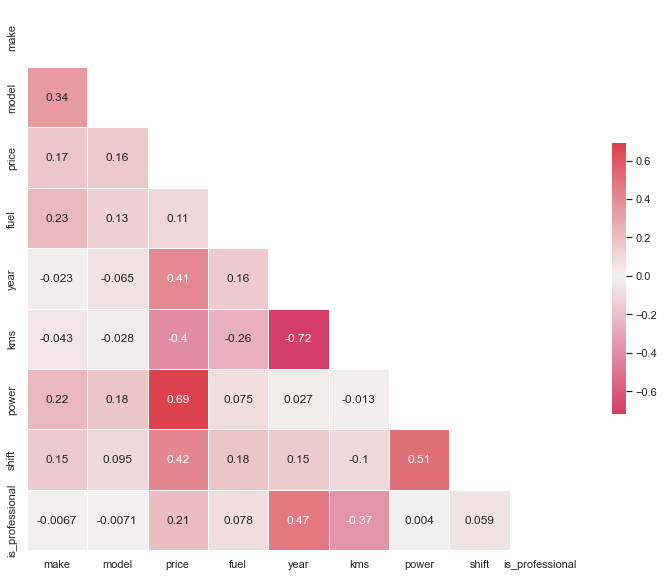

In [18]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(cluster.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)



sns.heatmap(cluster.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5},
           annot=True);


In [17]:
cluster.drop(columns=['province','doors'], inplace=True)

C:\Users\alima\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Random Forest**

In [145]:
X=cluster.drop('price', axis=1)

y=cluster.price

In [146]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=23)

In [147]:
bosque=RFR()

In [148]:
X=scaler.fit_transform(X)

In [149]:
bosque.fit(X_train,y_train)

RandomForestRegressor()

In [155]:
y_pred=bosque.predict(X_test)

In [156]:
mse(y_pred,y_test,squared=False)

5439.506211085424

In [157]:
r2(y_pred,y_test)

0.8871023970923635

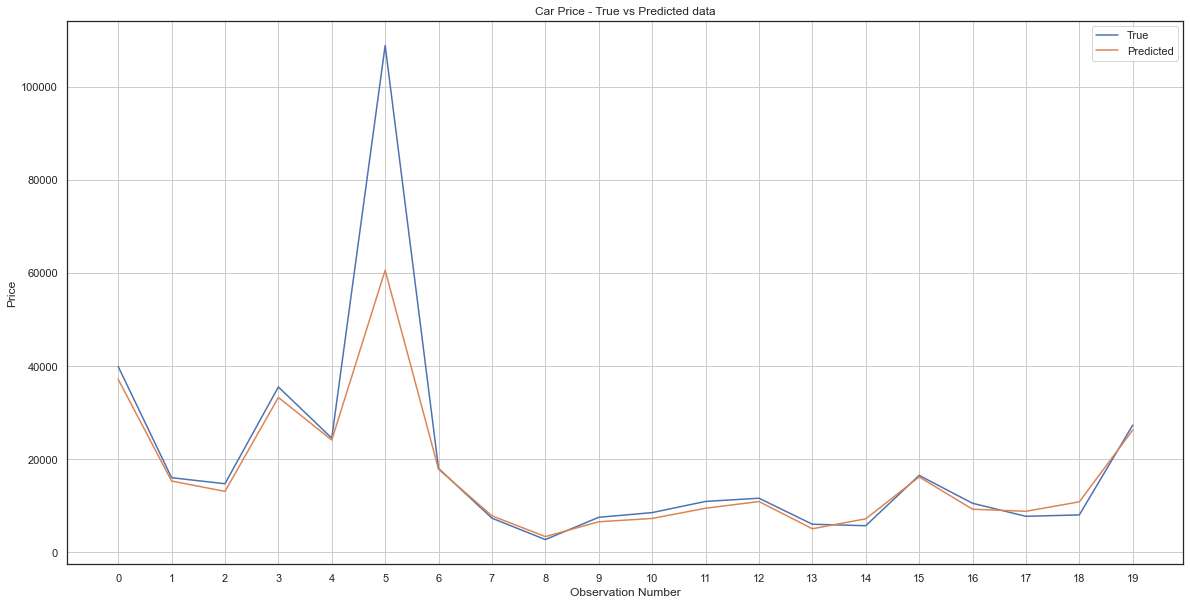

In [159]:
y_pred=bosque.predict(X_test)
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

**COMPARACION**

In [100]:
cochescom=pd.read_csv('coches.com_bueno.csv')
cochescom.drop(columns='Unnamed: 0', inplace=True)
cochescom.head()

,version,precio,combustible,CV,km,lugar,año,link,modelo,marca
0,Volkswagen Polo 1.0 TSI Advance 70kW,13.490,Gasolina,Unknown,36.000,Tenerife ...,2019,https://www.coches.com/coches-segunda-mano/oca...,Polo,Volkswagen
1,Toyota Yaris 1.5 Active,10.500,Gasolina,Unknown,62.200,Guadalajara ...,2017,https://www.coches.com/coches-segunda-mano/oca...,Yaris,Toyota
2,Skoda Fabia 1.4 16v Elegance 100,3.900,Gasolina,Unknown,225.000,Lleida,2000,https://www.coches.com/coches-segunda-mano/oca...,Fabia,Skoda
3,Citroen C4 Picasso 1.6e-HDi Exclusive 115,9.750,Diesel,Unknown,150.000,Madrid,2015,https://www.coches.com/coches-segunda-mano/oca...,C4,Citroen
4,Cupra Formentor 1.5 TSI 150,29.125,Gasolina,Unknown,0,Madrid,2022,https://www.coches.com/km0/seminuevo-cupra-for...,Formentor,Cupra


In [101]:

for i in range(len(cochescom)):
   
        try:
             if cochescom.CV[i]=='Unknown' and cochescom.version[i].split(' ')[-1].isnumeric():
                cochescom.CV[i]=int(cochescom.version[i].split(' ')[-1])
        except: 
            pass
for i in range(len(cochescom)):
    
        try:
            if cochescom.CV[i]=='Unknown' and cochescom.version.str.contains('kW')[i]:
                cochescom.CV[i]=kw_to_cv(cochescom.version[i])
        except: 
            pass

C:\Users\alima\AppData\Local\Temp/ipykernel_15564/3537906775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cochescom.CV[i]=int(cochescom.version[i].split(' ')[-1])
C:\Users\alima\AppData\Local\Temp/ipykernel_15564/3537906775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cochescom.CV[i]=kw_to_cv(cochescom.version[i])


In [118]:
cochescom.CV=cochescom.CV.str.replace('.','')

C:\Users\alima\AppData\Local\Temp/ipykernel_15564/258785238.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cochescom.CV=cochescom.CV.str.replace('.','')


In [60]:
cochescom.CV[3]=int(cochescom.version[3].rsplit(' ', 1)[-1])

C:\Users\alima\AppData\Local\Temp/ipykernel_15564/1225388830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cochescom.CV[3]=int(cochescom.version[3].rsplit(' ', 1)[-1])


In [119]:
cochescom.CV.value_counts()

Unknown    970
 150       244
 110       162
 130       149
 136        87
          ... 
 127         1
 449         1
 360         1
 290         1
 252         1
Name: CV, Length: 182, dtype: int64

In [106]:
columnas

['make',
 'model',
 'price',
 'fuel',
 'year',
 'kms',
 'power',
 'doors',
 'shift',
 'is_professional',
 'province']

In [76]:
cochescom.version.str.contains('kW').value_counts()

False    3654
True      324
Name: version, dtype: int64

In [99]:
def kw_to_cv(cadena):
    
    for inx, letra in enumerate(cadena):
        if letra in ["k","K"] and cadena[inx+1] in ["W","w"]:
            try:
                num= int(cadena[inx-3:inx])
            except:
                num= int(cadena[inx-2:inx])
    return int(num*1.36)

                


In [88]:
for i in cochescom.version:
    if "kw" in i:
        print(kw_to_cv(i))
    

In [89]:
cochescom.version.str.contains('kW')[0]

True

**RFR CON DUMMIES**

In [160]:
RFR_dum=entreno[columnas]
RFR_dum.dropna(axis=0, inplace=True)

C:\Users\alima\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [162]:
X_rfr=RFR_dum.drop('price', axis=1)
y_rfr=RFR_dum.price

In [163]:
X_rfr[['year','kms','power','doors']]=scaler.fit_transform(X_rfr[['year','kms','power','doors']])

In [164]:
X_rfr=pd.get_dummies(X_rfr, columns=['make','model','fuel','shift','is_professional','province'], drop_first=True)


In [165]:
X_train, X_test, y_train, y_test = tts(X_rfr, y_rfr, 
                                                    test_size=0.2, train_size=0.8,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33078, 1015), (8270, 1015), (33078,), (8270,))

In [166]:
bosque.fit(X_train,y_train)

RandomForestRegressor()

In [167]:
y_pred_rfr=bosque.predict(X_test)

In [168]:
mse(y_pred_rfr,y_test,squared=False)

4393.345329020351

In [170]:
r2(y_pred_rfr,y_test)

0.9254845209277132

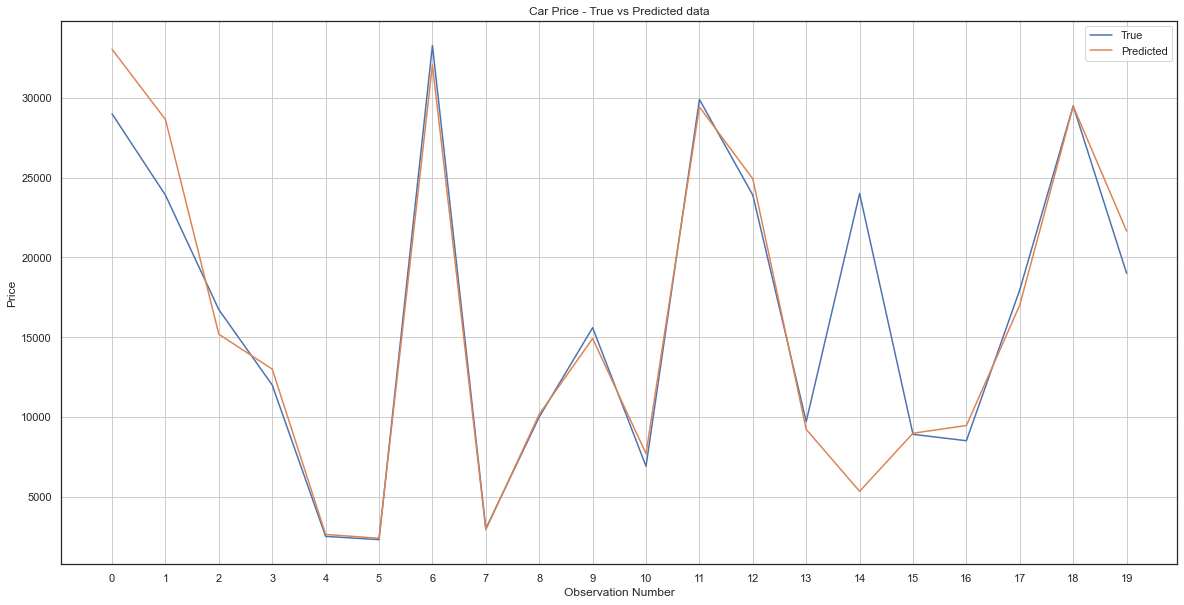

In [171]:
y_pred_rfr=bosque.predict(X_test)
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred_rfr[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')

plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [182]:
RFR_dum[RFR_dum.model=='Kona'].price

704      40600
766      39900
1032     19900
1303     17900
1597     17990
         ...  
48616    20990
49751    16890
49755    36300
49756    16990
49880    12990
Name: price, Length: 100, dtype: int64

**BUSQUEDA DE INDICES PARA FILTRAR LOS QUE DESVIAN EL MODELO**

In [214]:
RFR_dum[RFR_dum['price']==24000].iloc[34:35]

,make,model,price,fuel,year,kms,power,doors,shift,is_professional,province
31722,PEUGEOT,Boxer,24000,Diésel,2007.0,240000,157.0,4,Manual,False,Barcelona


In [218]:
diff=pd.DataFrame(y_test,y_pred_rfr, columns=['y_test','y_pred_rfr'])

In [220]:
cols = ['y_test','y_pred_rfr']
list_of_series = [y_test, y_pred_rfr]
df = pd.DataFrame(list_of_series, columns=cols)

In [246]:
diff=pd.DataFrame(y_test)
diff['pred']=y_pred_rfr
diff['diff']=((diff.pred-diff.price)**2)**0.5
diff

,price,pred,diff
40966,29000,33047.25,4047.25
32546,23900,28643.09,4743.09
31241,16720,15176.07,1543.93
13789,11990,12990.30,1000.30
17760,2500,2622.95,122.95
...,...,...,...
46571,16900,16254.12,645.88
29660,49869,48405.21,1463.79
26134,5990,8747.16,2757.16
4731,9995,8838.60,1156.40


In [273]:
diff.loc[diff['diff'] >= 1000,'SentimentType'] = 'Mal'
#diff.loc[diff['diff'] >500,'SentimentType'] = 'Regular'
diff.loc[diff['diff'] < 500,'SentimentType'] = 'Bien'

In [274]:
indices_mal=diff[diff.SentimentType=='Mal'].index
indices_regular=diff[diff.SentimentType=='Regular'].index
indices_bien=diff[diff.SentimentType=='Bien'].index

In [275]:
diff

,price,pred,diff,SentimentType
40966,29000,33047.25,4047.25,Mal
32546,23900,28643.09,4743.09,Mal
31241,16720,15176.07,1543.93,Mal
13789,11990,12990.30,1000.30,Mal
17760,2500,2622.95,122.95,Bien
...,...,...,...,...
46571,16900,16254.12,645.88,Regular
29660,49869,48405.21,1463.79,Mal
26134,5990,8747.16,2757.16,Mal
4731,9995,8838.60,1156.40,Mal


In [278]:
len(indices_mal), len(indices_regular), len(indices_bien)

(4416, 1629, 2225)

In [292]:
entreno[17760:17761]

,url,company,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
17760,5885e50644674bace24332f89a453d88,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C3,CITROEN C3 1.1i Furio 5p.,2500,NaN,Gasolina,2007.0,115000,61.0,5,Manual,Gris / Plata,6,False,55b7e8b895d047537e672250dd781555,Sevilla,Spain,2020-12-03 16:15:28,2021-01-15 00:00:00


In [311]:
bueno=[]
for i in indices_bien:
    bueno.append(entreno[columnas].iloc[i])   
        
        

In [335]:
bueno_df=pd.DataFrame(bueno)

In [336]:
mej=pd.concat([entreno[columnas],bueno_df])
mej.dropna(axis=0, inplace=True)
X_rfr_bien=mej.drop('price', axis=1)
y_rfr_bien=mej.price

In [337]:
X_rfr_bien[['year','kms','power','doors']]=scaler.fit_transform(X_rfr_bien[['year','kms','power','doors']])
X_rfr_bien=pd.get_dummies(X_rfr_bien, columns=['make','model','fuel','shift','is_professional','province'], drop_first=True)

In [338]:
bueno_dum=X_rfr_bien[-2225:]
bueno_dum.shape

(2225, 1015)

In [340]:
bueno_df_pred=bosque.predict(bueno_dum)

In [341]:
mse(bueno_df_pred, bueno_df.price,squared=False)

587.3159060859625

In [342]:
r2(bueno_df_pred, bueno_df.price)

0.996270821934328

**REGULAR**

In [343]:
regular=[]
for i in indices_regular:
    regular.append(entreno[columnas].iloc[i])   
regular_df=pd.DataFrame(regular)   
reg=pd.concat([entreno[columnas],regular_df])
reg.dropna(axis=0, inplace=True)
X_rfr_reg=reg.drop('price', axis=1)
y_rfr_reg=reg.price

X_rfr_reg[['year','kms','power','doors']]=scaler.fit_transform(X_rfr_reg[['year','kms','power','doors']])
X_rfr_reg=pd.get_dummies(X_rfr_reg, columns=['make','model','fuel','shift','is_professional','province'], drop_first=True)

reg_dum=X_rfr_reg[-1629:]
reg_dum.shape

(1629, 1015)

In [344]:
reg_df_pred=bosque.predict(reg_dum)

mse(reg_df_pred, regular_df.price,squared=False), r2(reg_df_pred, regular_df.price)

(807.1385692831217, 0.9914326521497131)

**MAL**

In [345]:
mal=[]
for i in indices_mal:
    mal.append(entreno[columnas].iloc[i])   
mal_df=pd.DataFrame(mal) 

In [346]:
mal_df

,make,model,price,fuel,year,kms,power,doors,shift,is_professional,province
40966,MERCEDES-BENZ,Clase C,29000,Diésel,2017.0,37400,170.0,2,Manual,False,Cádiz
32546,BMW,Serie 4,23900,Diésel,2017.0,84900,190.0,5,Automático,True,Málaga
31241,SUZUKI,Ignis,16720,Gasolina,2020.0,7,83.0,5,Manual,True,Almería
13789,FORD,C-Max,11990,Diésel,2016.0,72134,120.0,5,Manual,True,Murcia
45191,NISSAN,X-TRAIL,33290,Diésel,2020.0,1,150.0,5,Automático,True,Murcia
...,...,...,...,...,...,...,...,...,...,...,...
3209,VOLKSWAGEN,Passat,18900,Diésel,2016.0,57000,150.0,5,Automático,True,Valencia
29660,VOLVO,XC40,49869,Gasolina,2020.0,0,247.0,5,Automático,True,Valladolid
26134,NISSAN,Murano,5990,Gasolina,2006.0,204000,234.0,5,Automático,True,Madrid
4731,RENAULT,Grand Scénic,9995,Diésel,2014.0,119000,110.0,5,Manual,True,Orense


In [347]:
mal=pd.concat([entreno[columnas],mal_df])
mal.dropna(axis=0, inplace=True)
X_rfr_mal=mal.drop('price', axis=1)
y_rfr_mal=mal.price

X_rfr_mal[['year','kms','power','doors']]=scaler.fit_transform(X_rfr_mal[['year','kms','power','doors']])
X_rfr_mal=pd.get_dummies(X_rfr_mal, columns=['make','model','fuel','shift','is_professional','province'], drop_first=True)

mal_dum=X_rfr_mal[-4416:]
mal_dum.shape

(4416, 1015)

In [348]:
mal_df_pred=bosque.predict(mal_dum)

mse(mal_df_pred, mal_df.price,squared=False), r2(mal_df_pred, mal_df.price)

(6359.951835521272, 0.8833679423347617)